In [1]:
import wfdb
import scipy.io
import os
import numpy as np
import collections
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

In [2]:
path_to_data = 'H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\\training\\tr03-0029'

path_to_data = './tr03-0029'

item = 'tr03-0029'

combined = os.path.join(path_to_data, item)


In [28]:
"""
There are 4 files

tr03-0029.arousal
tr03-0029.hea
tr03-0029.mat (Matlab V4 file)
tr03-0029-arousal.mat (Matlab V7 structure)
"""

print(os.listdir(path_to_data))


# Arousal files (.mat)
matrix_thing = scipy.io.loadmat(combined + ".mat")

print(matrix_thing['val'].shape)

print(type(matrix_thing['val']))

['index.html', 'tr03-0029-arousal.mat', 'tr03-0029.arousal', 'tr03-0029.hea', 'tr03-0029.mat']
(13, 4770000)
<class 'numpy.ndarray'>


#### Labels they have aggregated for us. 


- Number of target arousals

    - Bruxism – 30 
    - Cheyne-Stokes breathing – 3 
    - Hypoventilation – 4 
    - Noise – 1 
    - Partial airway obstruction – 11 
    - PLM – 36 
    - RERA – 43,822 
    - Snoring – 28
    - Spontaneous – 70 

- Number of non-target arousals
    - Hypopnea – 56,936 
    - Central apnea – 22,763 
    - Mixed apnea – 2,641 
    - Obstructive apnea – 32,547 
    
    
    
    
PLM: Periodic leg movement

RERA: Respiratory effort-related arousals

<HDF5 file "tr03-0029-arousal.mat" (mode r)>
<KeysViewHDF5 ['#refs#', 'data']>

<KeysViewHDF5 ['a']>
<HDF5 dataset "a": shape (2,), type "<u8">

<KeysViewHDF5 ['arousals', 'sleep_stages']>
<HDF5 dataset "arousals": shape (4770000, 1), type "<f8">

<KeysViewHDF5 ['nonrem1', 'nonrem2', 'nonrem3', 'rem', 'undefined', 'wake']>
<HDF5 dataset "nonrem1": shape (1, 4770000), type "|u1">



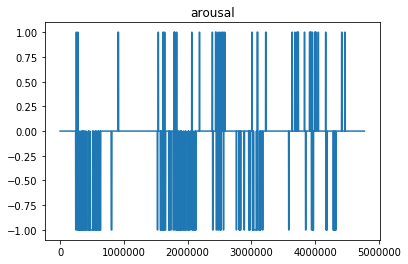

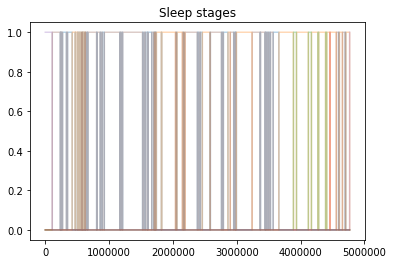

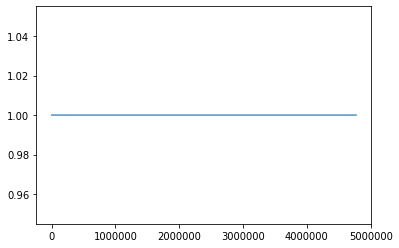

In [4]:
import h5py

def why_they_implement_this_so_bad(input):
    
    arr = np.zeros(input.shape, dtype='int32')
    input.read_direct(arr)
    return arr



"""
Have to use h5py to open these files. I don't entirely understand this format but it's fine.
It seems very reminiscent of MATLAB 

"""

with h5py.File(combined + "-arousal.mat", 'r') as f:
    print(f)
    print(f.keys())
    print()
    print(f['#refs#'].keys())
    print(f['#refs#']['a'])
    print()
    print(f['data'].keys())
    print(f['data']['arousals'])
#     dset = f['data']['arousals']
    print()
    print(f['data']['sleep_stages'].keys())
    print(f['data']['sleep_stages']['nonrem1'])

    print()
    arr = why_they_implement_this_so_bad(f['data']['arousals'])

    arr = np.squeeze(arr)
    plt.plot(arr, label="arousal")
#     plt.legend()
    plt.title("arousal")
    plt.show()
    plotting_matrix = np.zeros((6, 4770000), dtype='int32')
    
    for i, key in enumerate(f['data']['sleep_stages'].keys()):
        arr = why_they_implement_this_so_bad(f['data']['sleep_stages'][key])
        arr = np.squeeze(arr)
        plt.plot(arr, alpha=0.3, label=key)
        
        plotting_matrix[i] = arr
    plt.title("Sleep stages")
    plt.show()
    
#     Sanity check to see if there are no 'overlapping' sleep stages
    bah = plotting_matrix.sum(axis=0)
    plt.plot(bah, alpha=0.8)




In [5]:
# Signal (.mat) and header (.hea) files
record = wfdb.rdrecord(combined)

# Arousal annotation files (.arousal)
annotation = wfdb.rdann(combined, 'arousal')

In [6]:
"""
Actual PSG recording data
"""

print(matrix_thing.keys())

print(matrix_thing['val'].shape)

dict_keys(['val'])
(13, 4770000)


In [7]:
print(annotation.__dict__.keys())

print(record.__dict__.keys())

dict_keys(['record_name', 'extension', 'sample', 'symbol', 'subtype', 'chan', 'num', 'aux_note', 'fs', 'label_store', 'description', 'custom_labels', 'contained_labels', 'ann_len'])
dict_keys(['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size'])


In [8]:
print(annotation.__dict__)
print("\n", "-"*80, "\n")
print(record.__dict__)

{'record_name': 'tr03-0029', 'extension': 'arousal', 'sample': array([ 108000,  234000,  240000,  245674,  246000,  249974,  251920,
        252000,  254580,  269442,  270000,  273802,  276422,  279162,
        283670,  286590,  291948,  294568,  300250,  302950,  305956,
        309435,  311466,  313226,  316780,  320500,  326136,  330000,
        330536,  334046,  338166,  347344,  348000,  349604,  354188,
        356448,  359002,  361542,  366802,  370062,  375740,  377940,
        378900,  381440,  384630,  387790,  391830,  394330,  395210,
        398489,  399666,  402046,  409194,  412134,  415120,  417480,
        420000,  420434,  425034,  428932,  432432,  436132,  439611,
        444606,  447646,  451658,  455258,  456850,  460270,  462116,
        465076,  468000,  469610,  472410,  474000,  476394,  479794,
        482124,  485744,  487806,  490826,  494368,  497828,  501422,
        504000,  506502,  510000,  514254,  517574,  522000,  525606,
        528106,  531286,  5

In [9]:
"""
O.K. so from what I understand. Sample gives you the time-indices for the events (or change in events). 
The first event, 'waking' is from 0:108000 for example. 

subtype are integers for event types? but there are 26? They do not seem to correspond to the  aux note.

chan is ?? but there are 2 channels, probably the first 2, see below on figure. Maybe where the annotators 
found the event? hmm or where it's most visible? First 2 EEG are 'F3-M2' and 'F4-M1'

aux_note tells me what the event is, but the way it's written is difficult for me to extract...
what does '(resp_hypopnea', 'N1', 'resp_hypopnea)' mean? The start and end of a resp_hypopnea event?

I probably have to bin data like the first place winner did.



P.S The annotation data only goes to 4710000 whereas the actual data goes to 4770000, which is 5 seconds difference. 
No anotation, but I can assume it's wake? not sure so will ignore.
"""

print(annotation.sample.shape, len(annotation.symbol))

print(len(annotation.aux_note))

print("\n", "-"*80, "\n")

print(record.p_signal.shape)

print(record.sig_name)




(496,) 496
496

 -------------------------------------------------------------------------------- 

(4770000, 13)
['F3-M2', 'F4-M1', 'C3-M2', 'C4-M1', 'O1-M2', 'O2-M1', 'E1-M2', 'Chin1-Chin2', 'ABD', 'CHEST', 'AIRFLOW', 'SaO2', 'ECG']


In [10]:
cnt = collections.Counter()

for thing in annotation.aux_note:
    cnt[thing] += 1

print(cnt)

cnt2 = collections.Counter()

for thing in annotation.subtype:
    cnt2[thing] += 1

print("\n\n There are {} classes of sleep in this sequence \n".format(len(cnt2)), cnt2)

Counter({'(resp_hypopnea': 85, 'resp_hypopnea)': 85, '(resp_obstructiveapnea': 61, 'resp_obstructiveapnea)': 61, '(arousal_rera': 44, 'arousal_rera)': 44, 'N1': 41, 'W': 32, 'N2': 24, '(resp_centralapnea': 7, 'resp_centralapnea)': 7, 'N3': 4, 'R': 1})


 There are 12 classes of sleep in this sequence 
 Counter({16: 85, 17: 85, 22: 61, 23: 61, 1: 48, 0: 44, 3: 41, 5: 32, 2: 24, 12: 7, 13: 7, 4: 1})


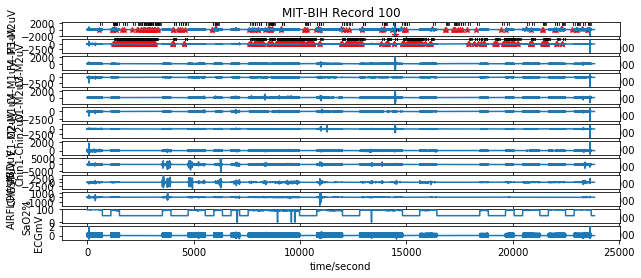

In [11]:
# plotting the record object with annotation

wfdb.plot_wfdb(record=record, annotation=annotation, plot_sym=True,
                   time_units='seconds', title='MIT-BIH Record 100',
                   figsize=(10,4))

In [12]:
def go_through_all_data():

    cnt = collections.Counter()
    cnt2 = collections.Counter()


    folder_path = 'H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\\training\\'
    total_folder = len(os.listdir(folder_path))

    print(total_folder)
    counter = 0

    old_set = set([])
    old_set2 = set([])
    
    for root, dirs, files in tqdm(os.walk(folder_path), total=total_folder):

        if counter == 0:
            counter += 1
            continue

        head_tail = os.path.split(root) 
        combined = os.path.join(root, head_tail[-1])

        # Signal (.mat) and header (.hea) files
        record = wfdb.rdrecord(combined)
        # Arousal annotation files (.arousal)
        annotation = wfdb.rdann(combined, 'arousal')

        for thing in annotation.aux_note:
            cnt[thing] += 1
        for thing in annotation.subtype:
            cnt2[thing] += 1




        new_set = set(cnt.keys())
        new_set2 = set(cnt2.keys())

        print(head_tail[-1])
        print(old_set.symmetric_difference(new_set))
        print(old_set2.symmetric_difference(new_set2))

        old_set = new_set
        old_set2 = new_set2
        counter += 1

    #     if counter == 20:
    #         break


In [13]:
print(cnt)
print()
print(cnt2)


print(f"Annotation notes have {len(cnt.keys())} unique keys \n")
print(f"Subtypes have {len(cnt2.keys())} unique keys")


print(cnt2.most_common(),"\n\n")
print(cnt2.keys())
print(cnt2.values())

Counter({'(resp_hypopnea': 85, 'resp_hypopnea)': 85, '(resp_obstructiveapnea': 61, 'resp_obstructiveapnea)': 61, '(arousal_rera': 44, 'arousal_rera)': 44, 'N1': 41, 'W': 32, 'N2': 24, '(resp_centralapnea': 7, 'resp_centralapnea)': 7, 'N3': 4, 'R': 1})

Counter({16: 85, 17: 85, 22: 61, 23: 61, 1: 48, 0: 44, 3: 41, 5: 32, 2: 24, 12: 7, 13: 7, 4: 1})
Annotation notes have 13 unique keys 

Subtypes have 12 unique keys
[(16, 85), (17, 85), (22, 61), (23, 61), (1, 48), (0, 44), (3, 41), (5, 32), (2, 24), (12, 7), (13, 7), (4, 1)] 


dict_keys([5, 3, 16, 17, 0, 1, 22, 23, 2, 12, 13, 4])
dict_values([32, 41, 85, 85, 44, 48, 61, 61, 24, 7, 7, 1])


32 41 24 44 48 85


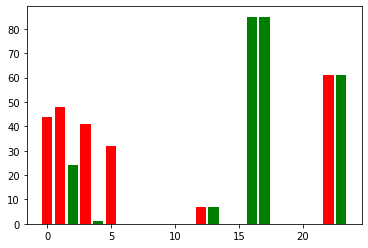

In [14]:
"""
I sincerely do not understand what they did here. How was this data annotated? I will just ignore this

"""

color_scheme = ['g' for x in list(range(26))]

print(cnt2[5], cnt2[3], cnt2[2], cnt2[0], cnt2[1], cnt2[16])

for i in [0,1,4,5,6,9]:
    color_scheme[i] = 'r'

plt.bar(cnt2.keys(), cnt2.values(), color=color_scheme, log=False)
plt.show()



32 41 24 4 1 0


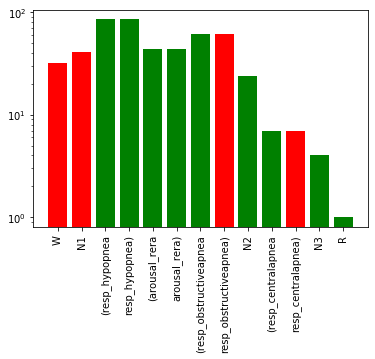

In [15]:
print(cnt['W'], cnt['N1'], cnt['N2'], cnt['N3'], cnt['R'], cnt[''])


color_scheme = ['g' for x in list(range(32))]
for i in [0,1,7,10,25]:
    color_scheme[i] = 'r'

plt.bar(cnt.keys(), cnt.values(), color=color_scheme, log=True)
ax = plt.gca()
plt.xticks(rotation=90)
plt.show()

# HOW THE RAW DATA WAS ANNOTATED 

#### The sleep stages of the subjects were annotated by clinical staff at the MGH according to the American Academy of Sleep Medicine (AASM) manual for the scoring of sleep. 

- More specifically, the following six sleep stages were annotated in 30 second contiguous intervals: 
    1. wakefulness, 
    - stage 1, 
    - stage 2, 
    - stage 3, 
    - rapid eye movement (REM), 
    - and undefined.


This is correct, from the data we can extract the following annotations:

- N1
- N2
- N3
- R
- W
- undefined (I am assuming it's the one without any label?)


#### Certified sleep technologists at the MGH also annotated waveforms for the presence of arousals that interrupted the sleep of the subjects. 
- The annotated arousals were classified as either: 
    1. spontaneous arousals, 
    - respiratory effort related arousals (RERA), 
    - bruxisms, 
    - hypoventilations, 
    - hypopneas, 
    
    - apneas (central, obstructive and mixed), (Are these binned?)
    - vocalizations, 
    - snores, 
    - periodic leg movements, 
    - Cheyne-Stokes breathing or partial airway obstructions (Are these binned?)


#### From looking into the data I have the following annotations, they correspond with the above?
Each annotation has a start and finish

- resp_hypopnea 
- resp_obstructiveapnea 
- resp_centralapnea 
- resp_mixedapnea
- resp_partialobstructive
- resp_cheynestokesbreath
- resp_hypoventilation


- arousal_rera 
- arousal_plm (periodic leg movement?)
- arousal_snore
- arousal_spontaneous
- arousal_noise
- arousal_bruxism

### There are 26 subtype values. I do not know what they represent


What do they mean? Did they bin? I don't understand



##### etc.

Not all individuals have all issues. Spontaneous arousals are particularly rare, according to [cite] with only 70 events.

Using combinatorics they binned these events I think (according to Howe-Patterson, which gives rise to their 'subtype' definition? But I am not sure, it's very confusing


# TODO: Get data in 'correct' format

### Choose a single EEG channel

### Create corresponding label, How will the outpout label look like?

- option 1: two vectors. one vector for arousals, other vector for sleep stage (for auxiliary loss)
- option 2: one vector with 'bins' like the winner did

### Dedice how to present a singular datum

- option 1: chunks of data (e.g. 30 seconds or 20 seconds, whatever) with corresponding label.
- option 2: A partial stream of data, with corresponding label vector
- option 3: The whole stream of data with whole label vector

In [16]:
def create_label_vector(annotation):

    """
    DO NOT USE, I DO NOT KNOW WHAT SUBTYPE MEANS
    
    
    Creates a vector with the same length as the sample, but fills it with the annotation subtype instead.
    This is better described in the paper by Howe-Patterson
    
    
    """
    
    
    start_point = 0
    label_vector = np.zeros(annotation.sample[-1])

    for i, end_point in enumerate(annotation.sample):
        label_vector[start_point:end_point] = annotation.subtype[i]

        start_point = end_point

    return label_vector

In [17]:
label_vector = create_label_vector(annotation)

In [18]:
def Howe_Patterson_binning(x):
    """
    
    NOT CORRECT
    
    
    From Howe-Patterson
    
    
    P(arousal) = P(bin 23)
    P(non-arousal) = P(bin 4) + P(bin8) + P(bin 14)
    P(apnea/hypopnea) = P(bin 8)
    P(no apnea and hypopnea) = P(bin 4) + P(bin 14) + P(bin 23), 
    P(wake) = P(bin 4) 
    P(sleep) = P(bin 8) + P(bin 14) + P(bin 23).
    
    
     Arousal presence/absence detection task: (target arousal
    = 1, non-target arousal (apnea/hypopnea or wake) = -1, and
    normal = 0),
    
     Apnea-hypopnea/normal detection task: (obstructive apnea/
    hypopnea = 1, central/mixed apnea = -1, and normal =
    0),
    
     Sleep/wake detection task: (sleep stages (REM,
    NREM1, NREM2, NREM3) = 1, wake = 0, and undefined
    stage = -1)

    Considering the above three possible conditions associated
    with every task, 27 combinations can be defined.
    To investigate the distribution of the data associated with
    all combinations, the histogram of the labelled data is obtained.
    As it is displayed in Figure 3, only 13 combinations
    out of 27 were non-empty. To simplify the structure of the
    network output layer that computes joint probabilities, the
    non-empty bins are remapped to 4 bins that are displayed
    in green color in Figure 3. All the red bins corresponding
    to the beginning of the record before annotating the first
    sleep epoch (undefined sleep stage) are remapped to bin 0.
    The data associated with bin 0 are still processed by our
    model during training, however it does not contribute to
    the loss gradient.
    
    """
    
    
#     if x == 0 or x == 3 or x == 6 or x == 12 or x == 21:
#         return 0
    
#     elif x == 1 or x == 2 or x == 5:
#         return 4
    
#     elif x == 7:
#         return 8
    
#     else:
#         return x

In [19]:
# Howe_Patterson_vector = [Howe_Patterson_binning(x) for x in label_vector]

In [20]:
# from matplotlib import pyplot as plt

# plt.plot(label_vector, alpha = 0.3)
# plt.plot(Howe_Patterson_vector, alpha = 0.3)
# plt.show()

In [21]:
import h5py

def why_they_implement_this_so_bad(input):
    
    arr = np.zeros(input.shape, dtype='int32')
    input.read_direct(arr)
    return arr



"""
Have to use h5py to open these files. I don't entirely understand this format but it's fine.
It seems very reminiscent of MATLAB 

"""


def create_data(file):

    with h5py.File(file + "-arousal.mat", 'r') as f:

        
        arr = why_they_implement_this_so_bad(f['data']['arousals'])
        
#         print("arousals", arr.size)
        
        full_matrix = np.zeros((7, arr.size), dtype='int32')


        arr = why_they_implement_this_so_bad(f['data']['arousals'])

        full_matrix[0] = np.squeeze(arr)

        
        for i, key in enumerate(f['data']['sleep_stages'].keys()):
            
#             print(key, f['data']['sleep_stages'][key].size)
            arr = why_they_implement_this_so_bad(f['data']['sleep_stages'][key])
            full_matrix[i+1] = np.squeeze(arr)






In [25]:
folder_path = 'H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\\training\\'

counter = 0



for root, dirs, files in tqdm(os.walk(folder_path), total=len(os.listdir(folder_path))):
    
    if False:
        # Signal (.mat) and header (.hea) files
        record = wfdb.rdrecord(combined)
        # Arousal annotation files (.arousal)
        annotation = wfdb.rdann(combined, 'arousal')
        
#     print(root)
    head_tail = os.path.split(root) 
    file = os.path.join(root, head_tail[-1])
    print(file)
    
    if counter == 0:
        counter+= 1
        continue
        
    create_data(file)

    if counter == 20:
        break
    
    counter+= 1


H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0005\tr03-0005
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0029\tr03-0029
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0052\tr03-0052
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0061\tr03-0061
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0078\tr03-0078
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0079\tr03-0079
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0083\tr03-0083
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0713\tr03-0713
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0715\tr03-0715
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0726\tr03-0726
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0733\tr03-0733
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0743\tr03-0743
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0759\tr03-0759
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0764\tr03-0764
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr03-0773\tr03-0773
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0029\tr04-0029
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0030\tr04-0030
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0039\tr04-0039
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0041\tr04-0041
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0075\tr04-0075
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0079\tr04-0079
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0117\tr04-0117
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0120\tr04-0120
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0785\tr04-0785
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0805\tr04-0805
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0806\tr04-0806
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0808\tr04-0808
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0825\tr04-0825
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0829\tr04-0829
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0864\tr04-0864
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr04-0878\tr04-0878
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0449\tr05-0449
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0456\tr05-0456
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0459\tr05-0459
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0471\tr05-0471
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0497\tr05-0497
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0501\tr05-0501
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0531\tr05-0531
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-0549\tr05-0549
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1229\tr05-1229
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1233\tr05-1233
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1234\tr05-1234
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1238\tr05-1238
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1243\tr05-1243
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1247\tr05-1247
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1258\tr05-1258
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr05-1268\tr05-1268
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0168\tr06-0168
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0177\tr06-0177
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0182\tr06-0182
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0193\tr06-0193
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0202\tr06-0202
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0204\tr06-0204
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0221\tr06-0221
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0232\tr06-0232
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0843\tr06-0843
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0850\tr06-0850
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0862\tr06-0862
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0865\tr06-0865
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0876\tr06-0876
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0880\tr06-0880
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-0883\tr06-0883
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr06-1010\tr06-1010
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0568\tr07-0568
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0575\tr07-0575
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0579\tr07-0579
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0585\tr07-0585
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0586\tr07-0586
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0593\tr07-0593
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0594\tr07-0594
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr07-0601\tr07-0601
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0303\tr08-0303
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0310\tr08-0310
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0314\tr08-0314
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0315\tr08-0315
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0336\tr08-0336
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0347\tr08-0347
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0348\tr08-0348
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr08-0351\tr08-0351
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0247\tr10-0247
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0251\tr10-0251
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0263\tr10-0263
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0306\tr10-0306
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0336\tr10-0336
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0350\tr10-0350
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0363\tr10-0363
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr10-0368\tr10-0368
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0457\tr11-0457
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0459\tr11-0459
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0471\tr11-0471
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0479\tr11-0479
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0481\tr11-0481
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0503\tr11-0503
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0509\tr11-0509
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr11-0510\tr11-0510
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0375\tr12-0375
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0395\tr12-0395
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0404\tr12-0404
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0408\tr12-0408
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0410\tr12-0410
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0412\tr12-0412
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0414\tr12-0414
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr12-0425\tr12-0425
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0374\tr13-0374
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0379\tr13-0379
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0383\tr13-0383
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0387\tr13-0387
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0425\tr13-0425
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0438\tr13-0438
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0447\tr13-0447
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\training\tr13-0448\tr13-0448
H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-

In [1]:
"""
https://physionet.org/content/sleep-edf/1.0.0/
sleep EDF dataset, not that handy, no arousals seem present
"""


import wfdb

path_to_data = 'C:\\Users\\320086129\\Downloads\\sc4002e0'

annotation = wfdb.rdann(path_to_data, 'hyp')
record = wfdb.rdrecord(path_to_data)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\320086129\\Downloads\\sc4002e0.hyp'

In [20]:
print(annotation.__dict__)
print("\n", "-"*80, "\n")
print(record.__dict__)

{'record_name': 'sc4002e0', 'extension': 'hyp', 'sample': array([   48,    80,   112,   144,   232,   302,   390,   478,  1311,
        1412,  2231,  2263,  2295,  2327,  2359,  2391,  2423,  2455,
        2487,  2519,  2551,  2583,  2615,  2647,  2679,  2711,  2743,
        2775,  2807,  2839,  2871,  2903,  2935,  2967,  2999,  3031,
        3063,  3095,  3127,  3159,  3191,  3223,  3255,  3287,  3370,
        3979,  4095,  4192,  4293,  4599,  4900,  5492,  5793,  5850,
        5907,  5995,  6083,  6171,  6503,  6606,  7490,  8081,  8183,
        8489,  8803,  9370,  9418,  9450,  9482,  9514,  9546,  9578,
        9610,  9642,  9674,  9706,  9738,  9770,  9802,  9834,  9866,
        9898,  9930,  9962, 10268, 10314, 10878, 11190, 11239, 11541,
       12101, 12149, 12458, 12508, 12540, 12572, 12604, 12636, 12668,
       12700, 12732, 12764, 12796, 12828, 12860, 12892, 12924, 12956,
       12988, 13020, 13052, 13084, 13116, 13148, 13180, 13212, 13244,
       13276, 13326, 13633, 1366

### Arousal Image generation

In [22]:
import matplotlib.pyplot as plt
import wfdb
import os

In [68]:
def plot_arousals(path):
        # Signal (.mat) and header (.hea) files
        record = wfdb.rdrecord(path)
        # Arousal annotation files (.arousal)
        annotation = wfdb.rdann(path, 'arousal')
             
        start = 99
        end = None
        
        start_idx = 0
        end_idx = 0
        
        counter = 0
        
        record = record.p_signal[:,0]

        for i, note in enumerate(annotation.aux_note):
            print(note, i, start, end)
            if note in ['W', 'N1', 'N2', 'N3', 'R', '']:
                continue
            else:
                if start == 99:
                    start = note.strip('()')
                    s = annotation.sample[i]
                else:
                    end = note.strip('()')
                    e = annotation.sample[i]
                        
                if start == end #and ("arousal" in start): 
                #TODO
                    #print("image made")
                    
                    if False: 
                        wfdb.plot_wfdb(record=record, annotation=annotation, plot_sym=True,
                       time_units='seconds', title='MIT-BIH Record 100',
                       figsize=(10,4))
                    
                        wfdb.plot_items(signal = record[s:e])
                        
                    plt.plot(record[s:e], alpha=0.5)
                    plt.title(start)
                    plt.xlim(0, 9060)
                    plt.ylim(-50, 50)
                    plt.show()
                    
                    start = 99
                    end = None

                    

                    
                
        
path = 'C:\\Users\\320086129\\Downloads\\sample_datum\\tr03-0005'
plot_arousals(path)

W 0 99 None
N1 1 99 None
(resp_centralapnea 2 99 None
resp_centralapnea) 3 resp_centralapnea None
W 4 resp_centralapnea resp_centralapnea
N1 5 resp_centralapnea resp_centralapnea
N2 6 resp_centralapnea resp_centralapnea
W 7 resp_centralapnea resp_centralapnea
(resp_centralapnea 8 resp_centralapnea resp_centralapnea
N1 9 resp_centralapnea resp_centralapnea
resp_centralapnea) 10 resp_centralapnea resp_centralapnea
(resp_centralapnea 11 resp_centralapnea resp_centralapnea
N2 12 resp_centralapnea resp_centralapnea
resp_centralapnea) 13 resp_centralapnea resp_centralapnea
(arousal_rera 14 resp_centralapnea resp_centralapnea
arousal_rera) 15 resp_centralapnea arousal_rera
(arousal_rera 16 resp_centralapnea arousal_rera
arousal_rera) 17 resp_centralapnea arousal_rera
W 18 resp_centralapnea arousal_rera
N1 19 resp_centralapnea arousal_rera
W 20 resp_centralapnea arousal_rera
(resp_centralapnea 21 resp_centralapnea arousal_rera
N1 22 resp_centralapnea resp_centralapnea
resp_centralapnea) 23 res